# In this Notebook we are building Model where we will predict the housing prices with the given Dataset.

Import the Libraries and read the dataset

In [528]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [529]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import time
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

In [530]:
df_house = pd.read_csv('kc_house_data.csv')

In [531]:
df_house.drop(columns=['id'], inplace=True)

In [532]:
df_house.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000   221900.0         3       1.00         1180      5650   
1  20141209T000000   538000.0         3       2.25         2570      7242   
2  20150225T000000   180000.0         2       1.00          770     10000   
3  20141209T000000   604000.0         4       3.00         1960      5000   
4  20150218T000000   510000.0         3       2.00         1680      8080   
5  20140512T000000  1225000.0         4       4.50         5420    101930   
6  20140627T000000   257500.0         3       2.25         1715      6819   
7  20150115T000000   291850.0         3       1.50         1060      9711   
8  20150415T000000   229500.0         3       1.00         1780      7470   
9  20150312T000000   323000.0         3       2.50         1890      6560   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   
5     1.0           0     0          3     11        3890           1530   
6     2.0           0     0          3      7        1715              0   
7     1.0           0     0          3      7        1060              0   
8     1.0           0     0          3      7        1050            730   
9     2.0           0     0          3      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570

# EDA and Feature Engineering

In [180]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


In [8]:
df_house.describe().transpose()

count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
yr_renovated   21613.0      84.402258     401.679240      0.0000       0.000   
zipcode        21613.0   98077.939805      53.505026  98001.0000   98033.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05

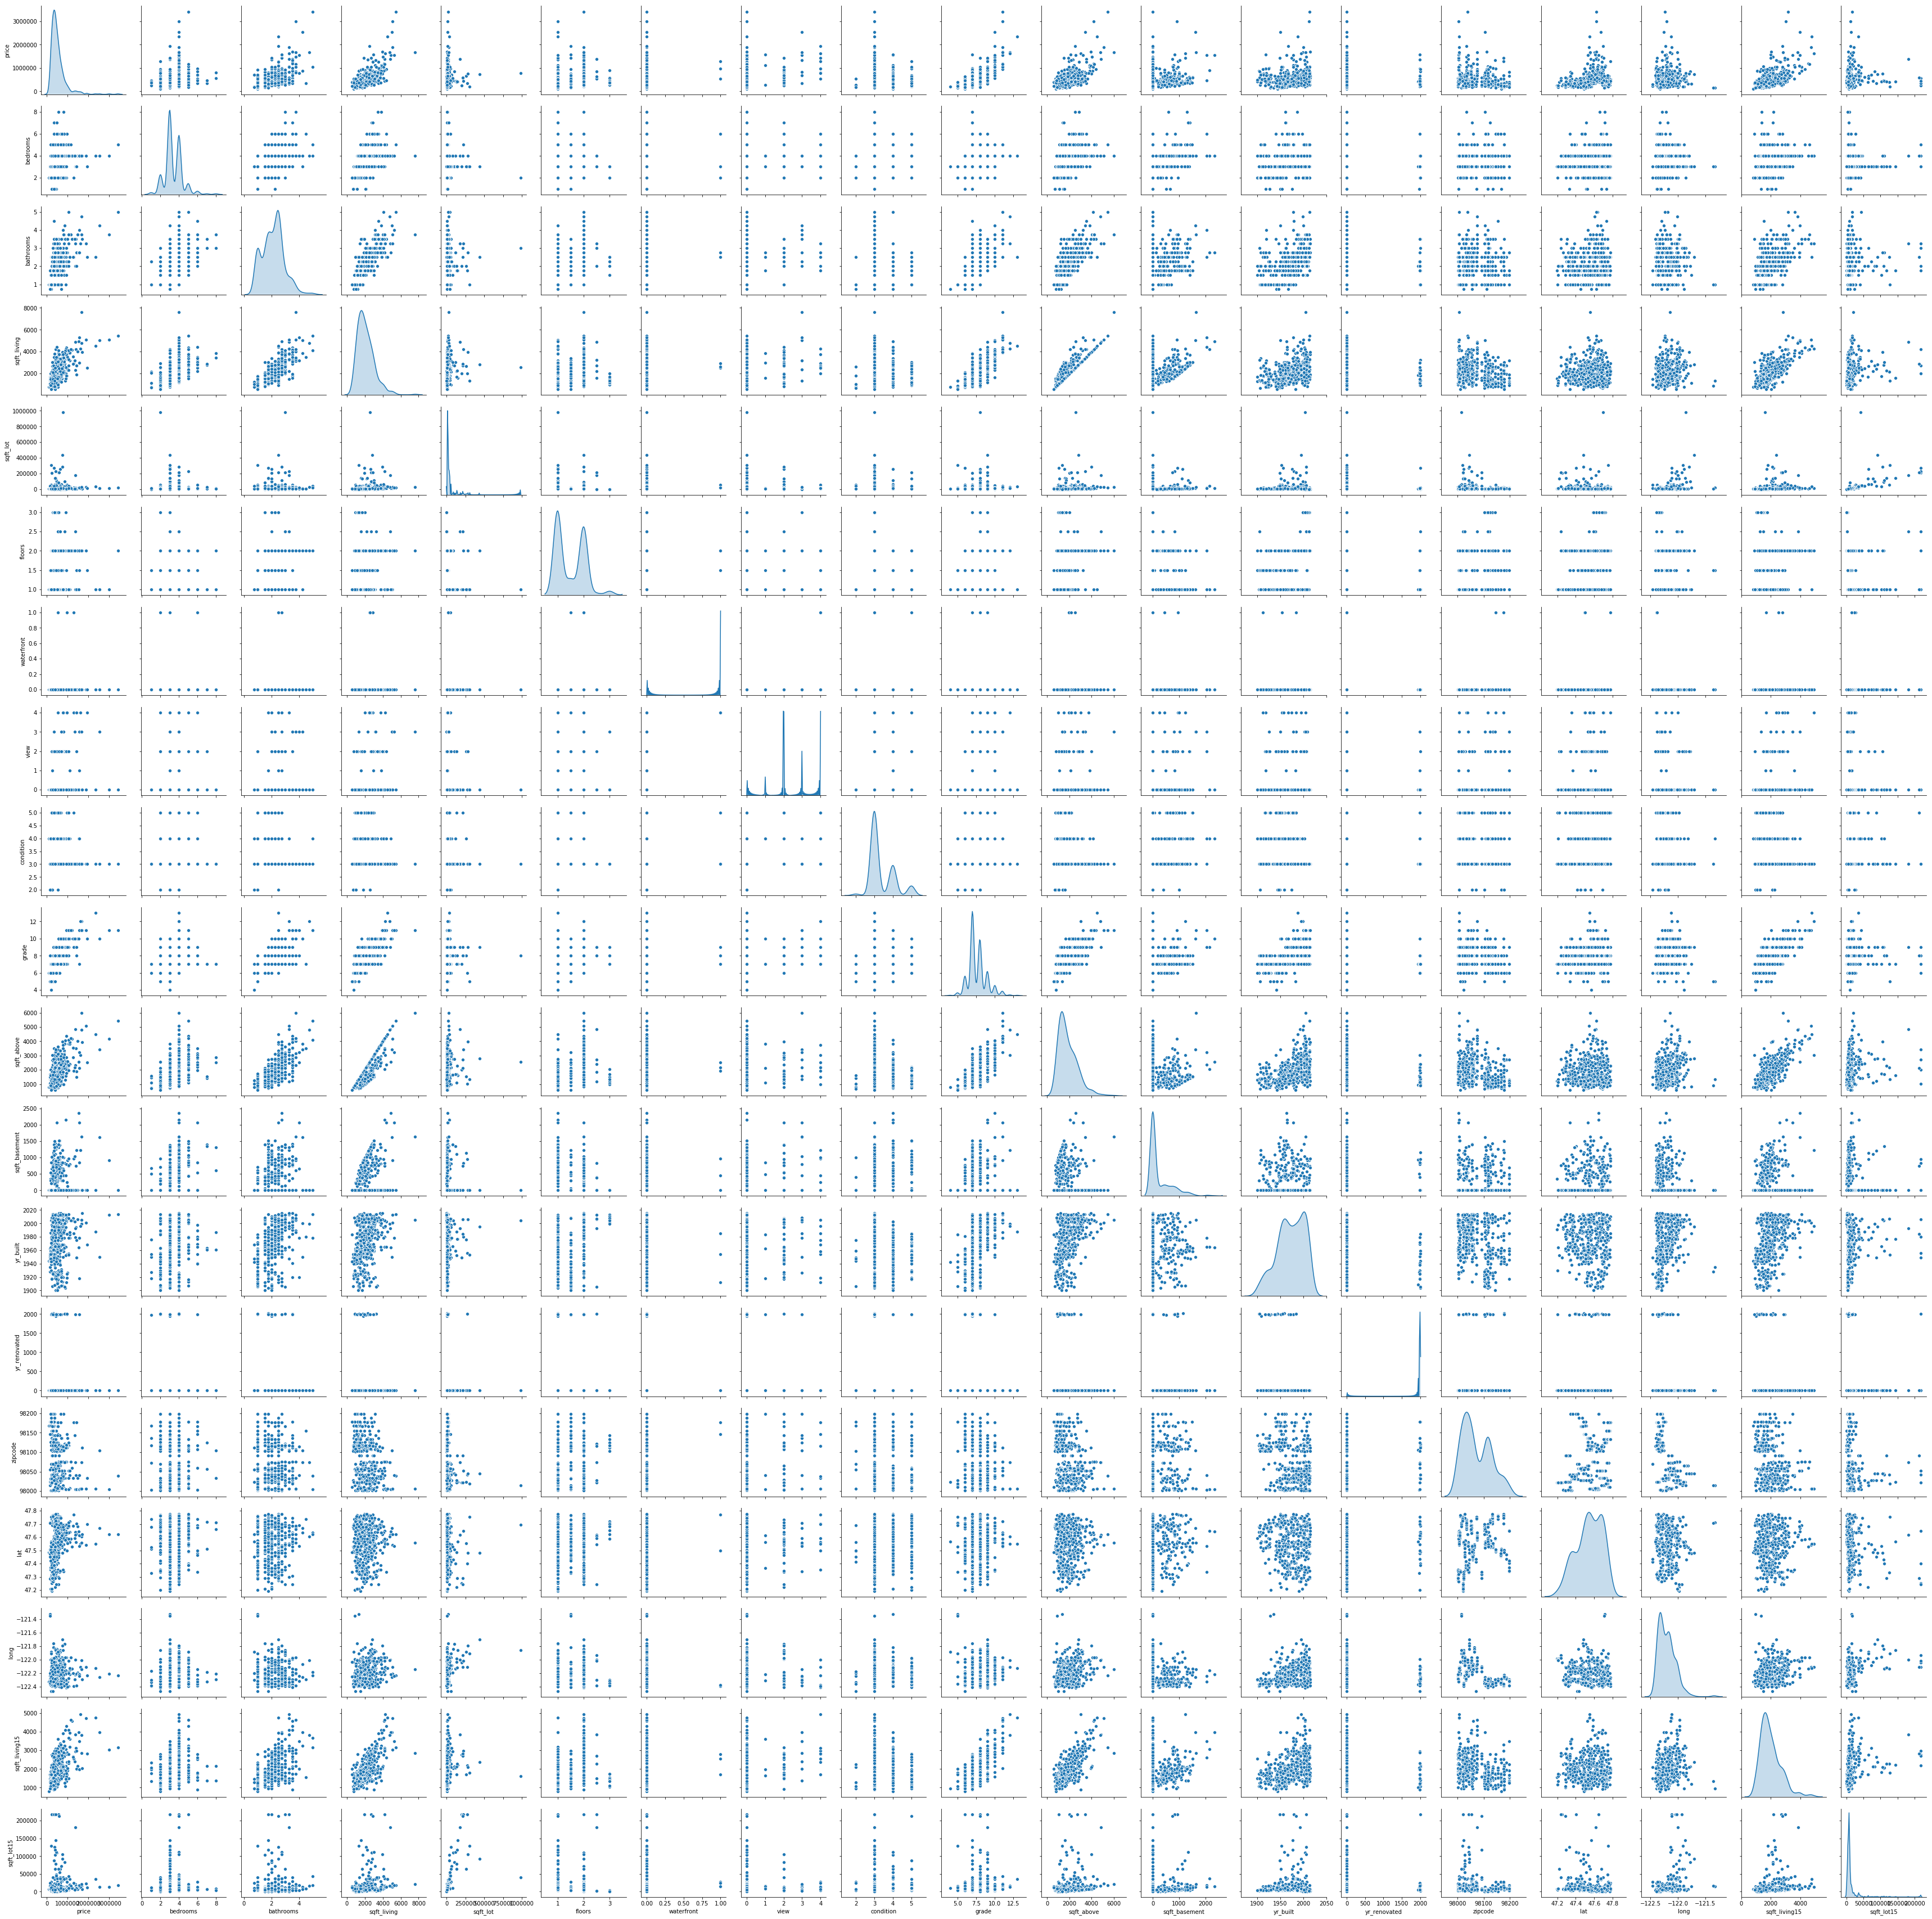

In [51]:
# Skipping Pair Plot analysis as this is breaking and taking lot of time to show the results.
start = time.time()
sns.pairplot(df_house.sample(500), diag_kind= 'kde')
end = time.time()

# Let us study how the various features impact the Pricing in the County.

1- Price and Bedrooms relation. 
We can infer that with the increase bedrooms the price increases. However some of the houses with more then bedrooms 8 are having lower price in dataset. Even the House with 33 bedrooms have lower price in comparison.

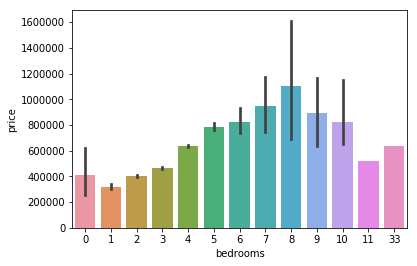

In [14]:
sns.barplot(df_house['bedrooms'],df_house['price'])

2- Price and Bathroom relation. Again we can infer that with the increase bathrooms number the price increases

<Figure size 720x720 with 0 Axes>

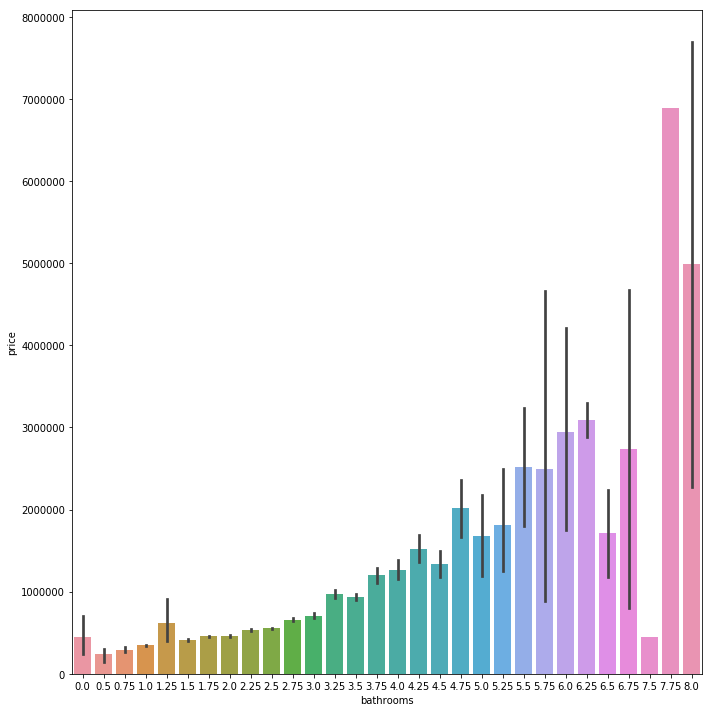

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(df_house['bathrooms'],df_house['price'])
plt.tight_layout()
plt.show()

3- Price relation with Floors. 

We can infer that max floor are 2.5 and prices does increase with the floor. However some of them does not go by this theory for ex: floor 3.5 and price is not increasing

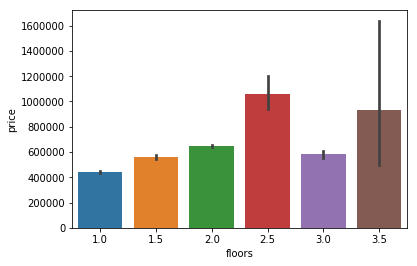

In [24]:
sns.barplot(df_house['floors'],df_house['price'])


4- Price with Waterfront. Houses with waterfront are more costlier then other.

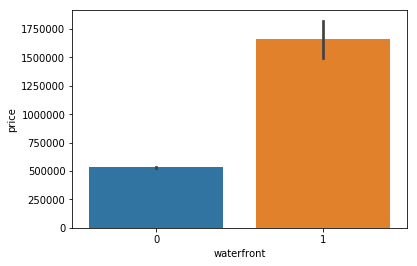

In [25]:
sns.barplot(df_house['waterfront'],df_house['price'])


4- Price with View.houses viewed max are more costlier then other.

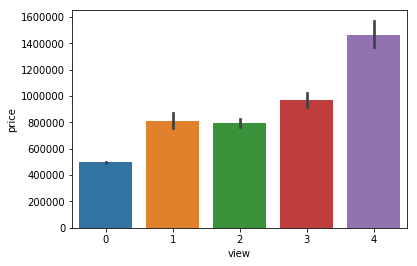

In [28]:
sns.barplot(df_house['view'],df_house['price'])


5- Price with Condition of house. Houses with good condition are pricing highest.

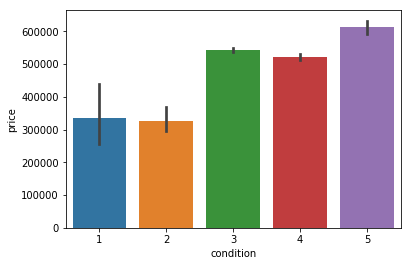

In [32]:
sns.barplot(df_house['condition'],df_house['price'])


6- Grading with Price. Max the Grading higher the pricing. Its directly correlated

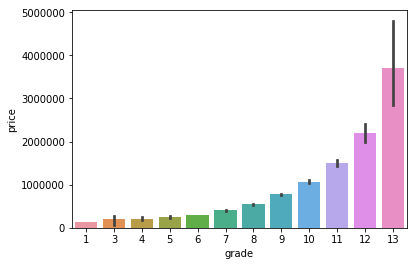

In [33]:
sns.barplot(df_house['grade'],df_house['price'])


7- Grade and condition. 
8- Let us analyse if the condition is good for house what is the grade provided and how it impacts pricing.
   
   With the hue as Condition we can analyze there is relation between price.

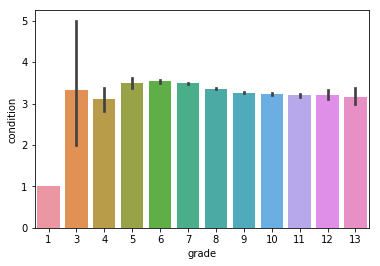

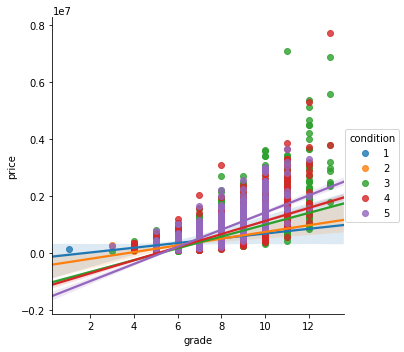

In [49]:
sns.barplot(df_house['grade'],df_house['condition'])


sns.lmplot('grade','price', df_house, hue= 'condition')

8- yrbuilt and Price relation. Using the Plotly we can infer that houses built in 2014 have max prices.

In [533]:
df_house.iplot(kind='bar',x = 'yr_built', y = 'price')

9- Relation between yr renovated and condition. 

There are houses which are never renovated. We will only look at the relation which have renovation >0

Very few houses which are renovated very late are having positive correlation with Prices.

In [55]:
df_house[df_house['yr_renovated'] == 0].count()

date             20699
price            20699
bedrooms         20699
bathrooms        20699
sqft_living      20699
sqft_lot         20699
floors           20699
waterfront       20699
view             20699
condition        20699
grade            20699
sqft_above       20699
sqft_basement    20699
yr_built         20699
yr_renovated     20699
zipcode          20699
lat              20699
long             20699
sqft_living15    20699
sqft_lot15       20699
dtype: int64

<Figure size 1080x360 with 0 Axes>

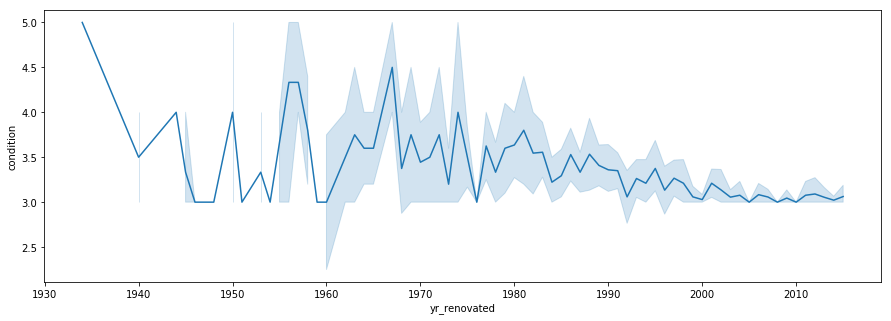

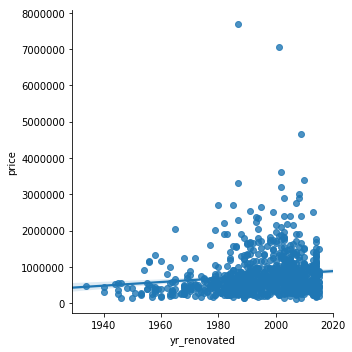

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'yr_renovated',y = 'condition', data = df_house[df_house['yr_renovated'] >0])

sns.lmplot(x = 'yr_renovated',y = 'price', data = df_house[df_house['yr_renovated'] >0])

10-sqftliving relation with price. Price and sqft_living is correlated. With Increase in Sqft_living there is an increase in the price

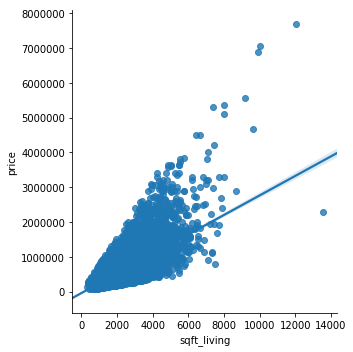

In [62]:
sns.lmplot(x = 'sqft_living', y ='price', data = df_house)

10-sqftlot relation with price. Price and sqftlot is correlated. With Increase in sqftlot there is an increase in the price



<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

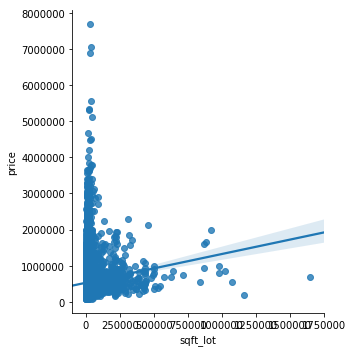

In [68]:
plt.figure(figsize=(30,20))
sns.lmplot(x = 'sqft_lot', y ='price', data = df_house)
plt.tight_layout()
plt.show()

12- sqft_above and Price relation. Price and sqft_above is correlated. With Increase in sqft_above there is an increase in the price.


<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

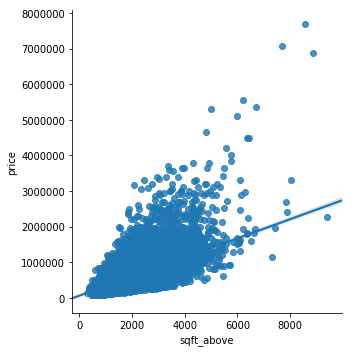

In [69]:
plt.figure(figsize=(30,20))
sns.lmplot(x = 'sqft_above', y ='price', data = df_house)
plt.tight_layout()
plt.show()

13- sqft_basement and Price. It is visible that there are some values with basement as 0. let us analyse w/0 0 what is the relation with price. Prices for houses with Basement have higher prices.

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



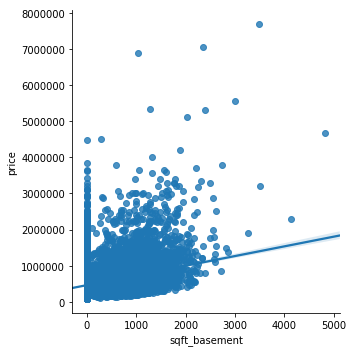

In [72]:
sns.lmplot(x = 'sqft_basement', y ='price', data = df_house)


In [75]:
df_house[df_house['sqft_basement'] == 0].count()

date             13126
price            13126
bedrooms         13126
bathrooms        13126
sqft_living      13126
sqft_lot         13126
floors           13126
waterfront       13126
view             13126
condition        13126
grade            13126
sqft_above       13126
sqft_basement    13126
yr_built         13126
yr_renovated     13126
zipcode          13126
lat              13126
long             13126
sqft_living15    13126
sqft_lot15       13126
dtype: int64

In [76]:
df_house['basement'] = df_house['sqft_basement'] > 0

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



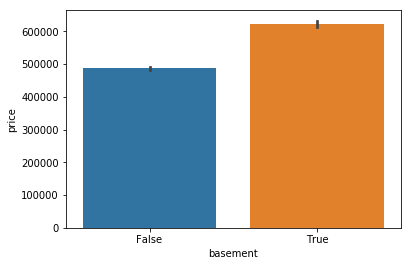

In [78]:
sns.barplot(x = 'basement', y ='price', data = df_house)


14- zipcode relation with Price. There is no relation between zipcode and price or very weak relation. NO impact of price from zipcode

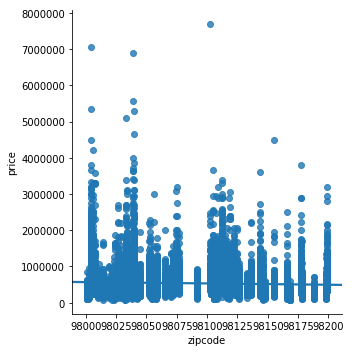

In [534]:
sns.lmplot(x = 'zipcode', y = 'price', data = df_house)

df_house.iplot(kind = 'scatter', x ='zipcode', y = 'price')

15- lat/long relation with Price. Price have no impact from the lat and long

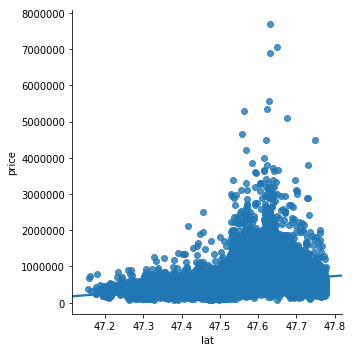

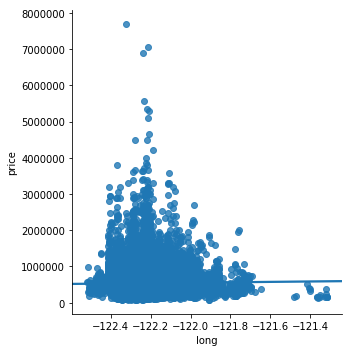

In [87]:
sns.lmplot(x = 'lat', y = 'price', data = df_house)
sns.lmplot(x = 'long', y = 'price', data = df_house)


16- sqft_living15 and sqft_lot15 relation with Price. with the increase in sqft and sqft_lot price increases

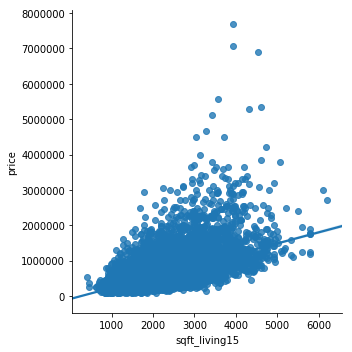

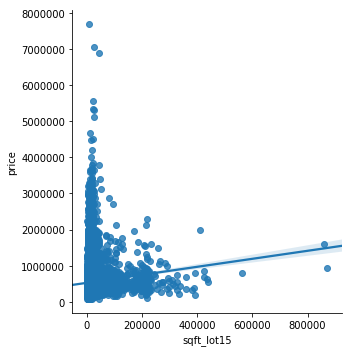

In [89]:
sns.lmplot(x = 'sqft_living15', y = 'price', data = df_house)
sns.lmplot(x = 'sqft_lot15', y = 'price', data = df_house)


17- Date and Price Relation.

In [96]:
df_house['date'] = pd.to_datetime(df_house['date'])

#  OBSERVATIONS:

# 1- Looking at the diagonals it is visible there are long tails which are sign of Outliers existing in the dataset.
 
# 2- There are multiple peaks in the diagnoals , we have some clusters existing in the dataset and when we productionized this model we will have to build seperate clusters and model for each cluster to better gneralized 

# 3- Here we are going to separate into separate clusters

# 4- Let us look at the variables separately if they have outliers

# 5- We will also create new Features as part of our Feature Engineering.

In [535]:
# sns.lineplot(x = 'date', y = 'price', data = df_house)

df_house.iplot(kind = 'bar',x = 'date', y = 'price')

# DATA PREPROCESSING

1- Outlier Handling. We can visualize there are exceptions existing ex: Bedrooms no 33 for house ranging to $6M which will have only impact on our model generalization. We should handle these outliers since we are creating the model for estimating the price on the basis of average specifications of house.

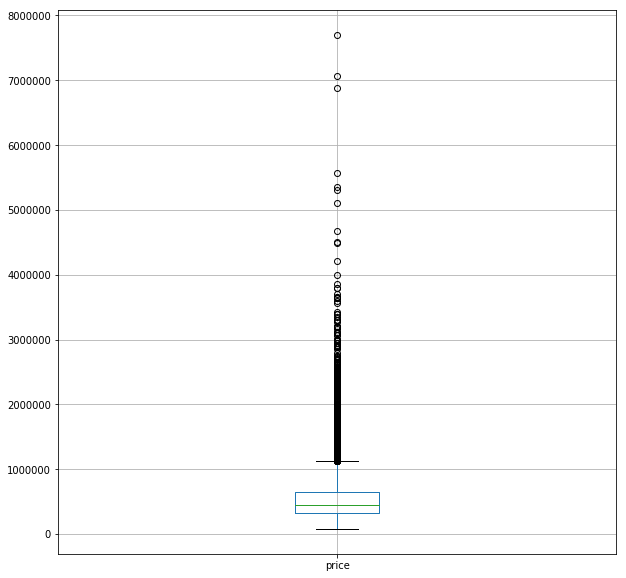

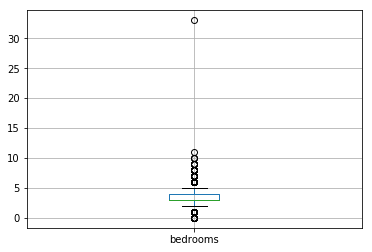

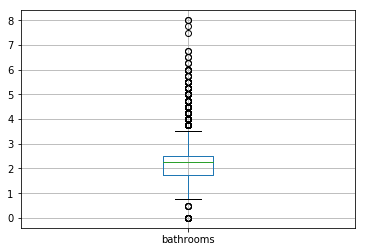

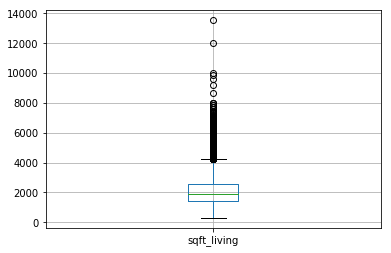

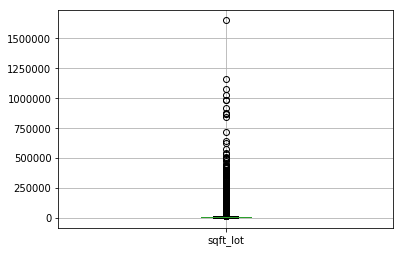

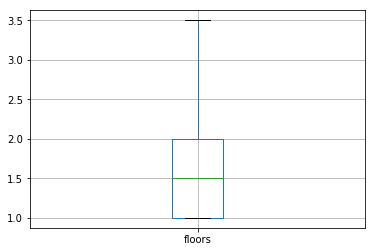

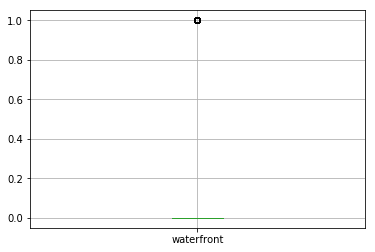

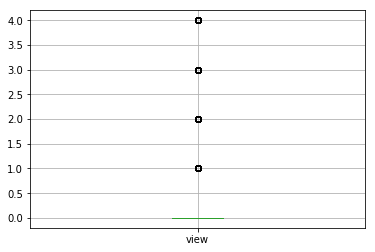

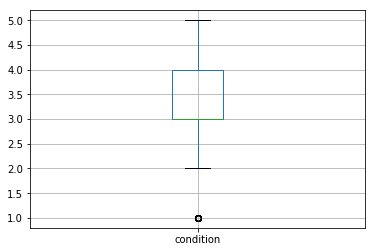

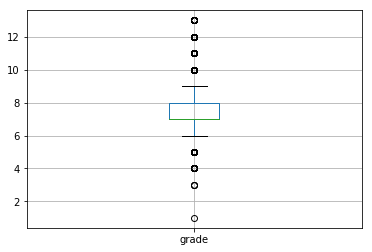

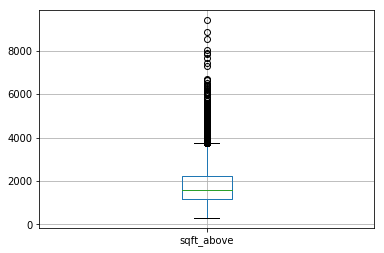

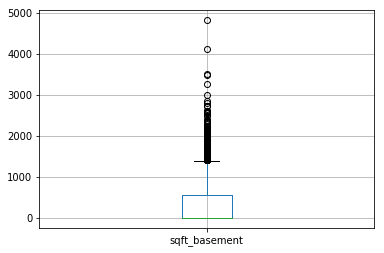

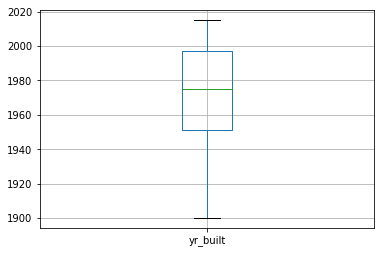

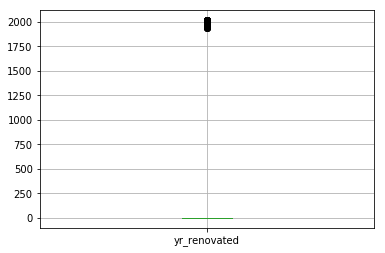

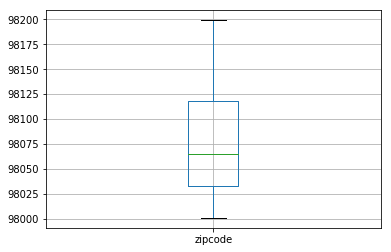

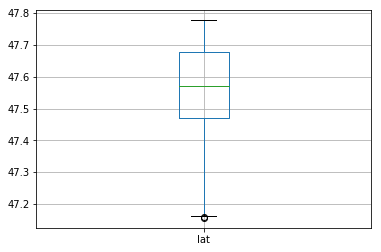

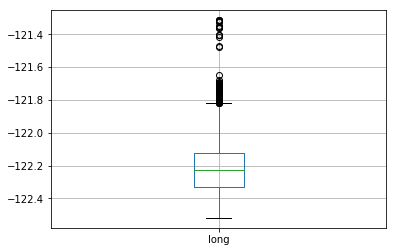

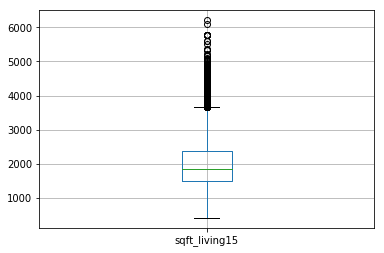

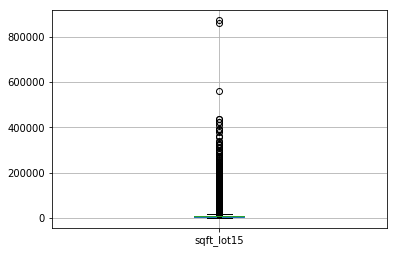

In [52]:
plt.figure(figsize=(10,10))
for i in df_house.columns:
    df_house.boxplot(column=i)
    plt.show()

# Outliers can be visually seen for various features :

 1-bedrooms 
 
 2-bathrooms 
 
 3-sqft_living 
 
 4-sqft_lot 
 
 5-sqft_above
 
 6-sqft_basement
 
 7-long
 
 8-lat
 
 9-sqft_living15
 
 10-sqft_lot15

# 1- Handling of outlier for feature Bedrooms , below we can see this is rightly skewed . 

# We will replace the outliers on Bedrooms with median where  values are Outside 3 standard deviations

<Figure size 720x2160 with 0 Axes>

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


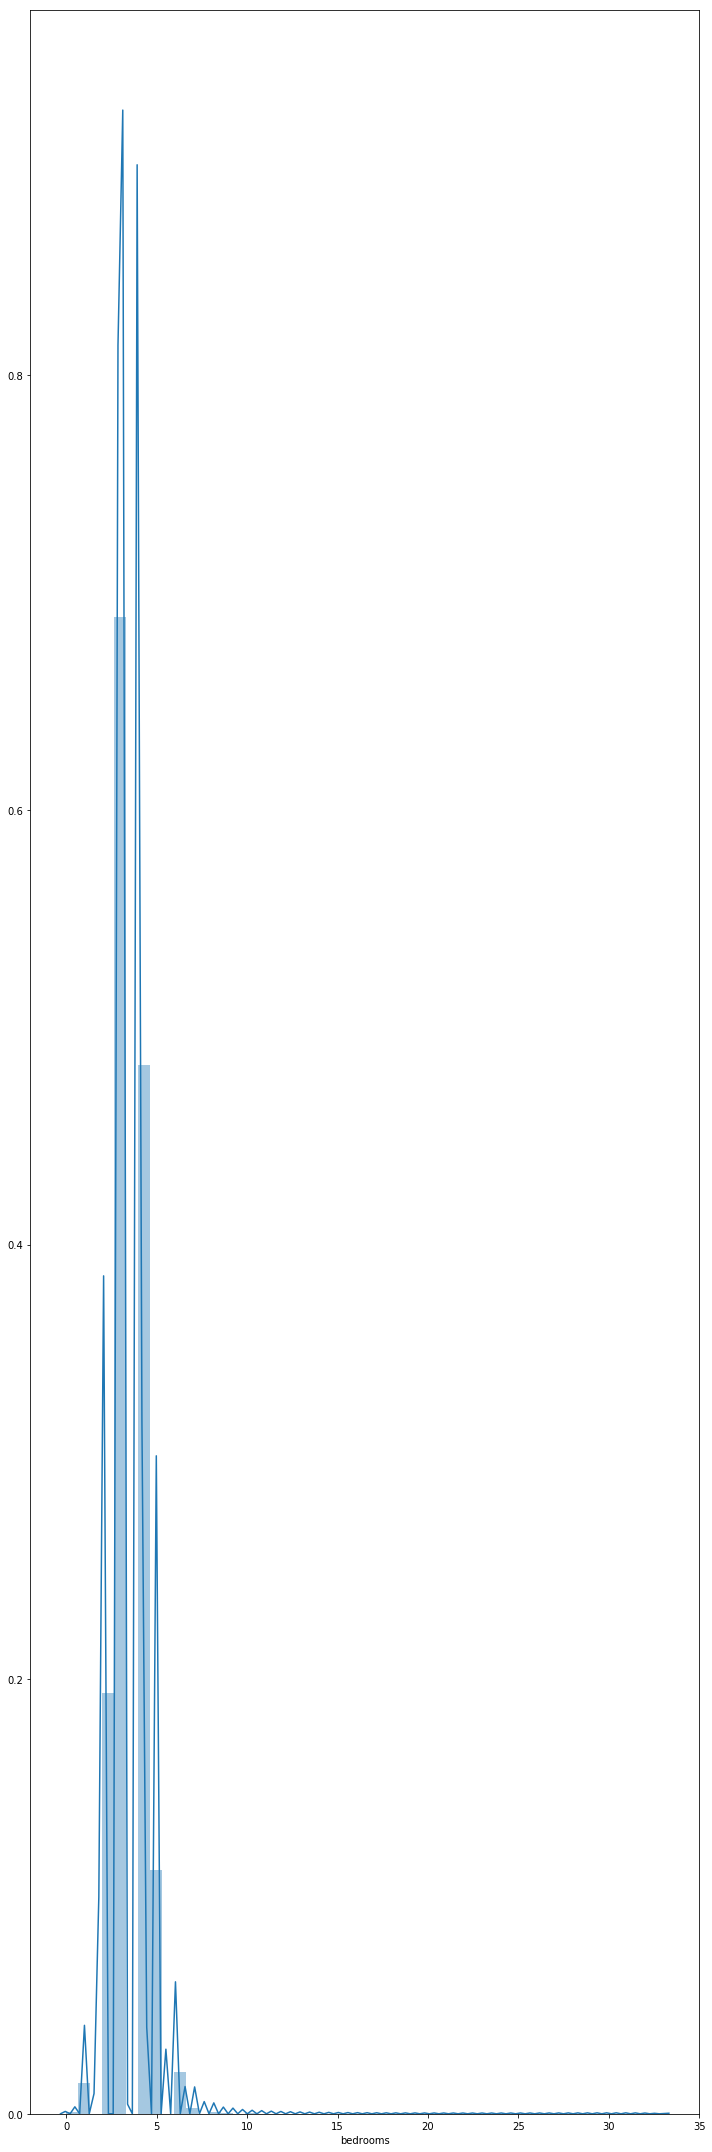

In [133]:
plt.figure(figsize=(10,30))
sns.distplot(df_house['bedrooms'])
plt.tight_layout()
plt.show()

In [250]:
median = df_house['bedrooms'].median(skipna = True)
median
df_house['bedrooms'] = np.where((df_house['bedrooms'] - median).abs() > (3*df_house.bedrooms.std()),median,df_house['bedrooms'])


3.0

Let us look at the bedrooms visually if there are still outliers

<Figure size 720x2160 with 0 Axes>

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



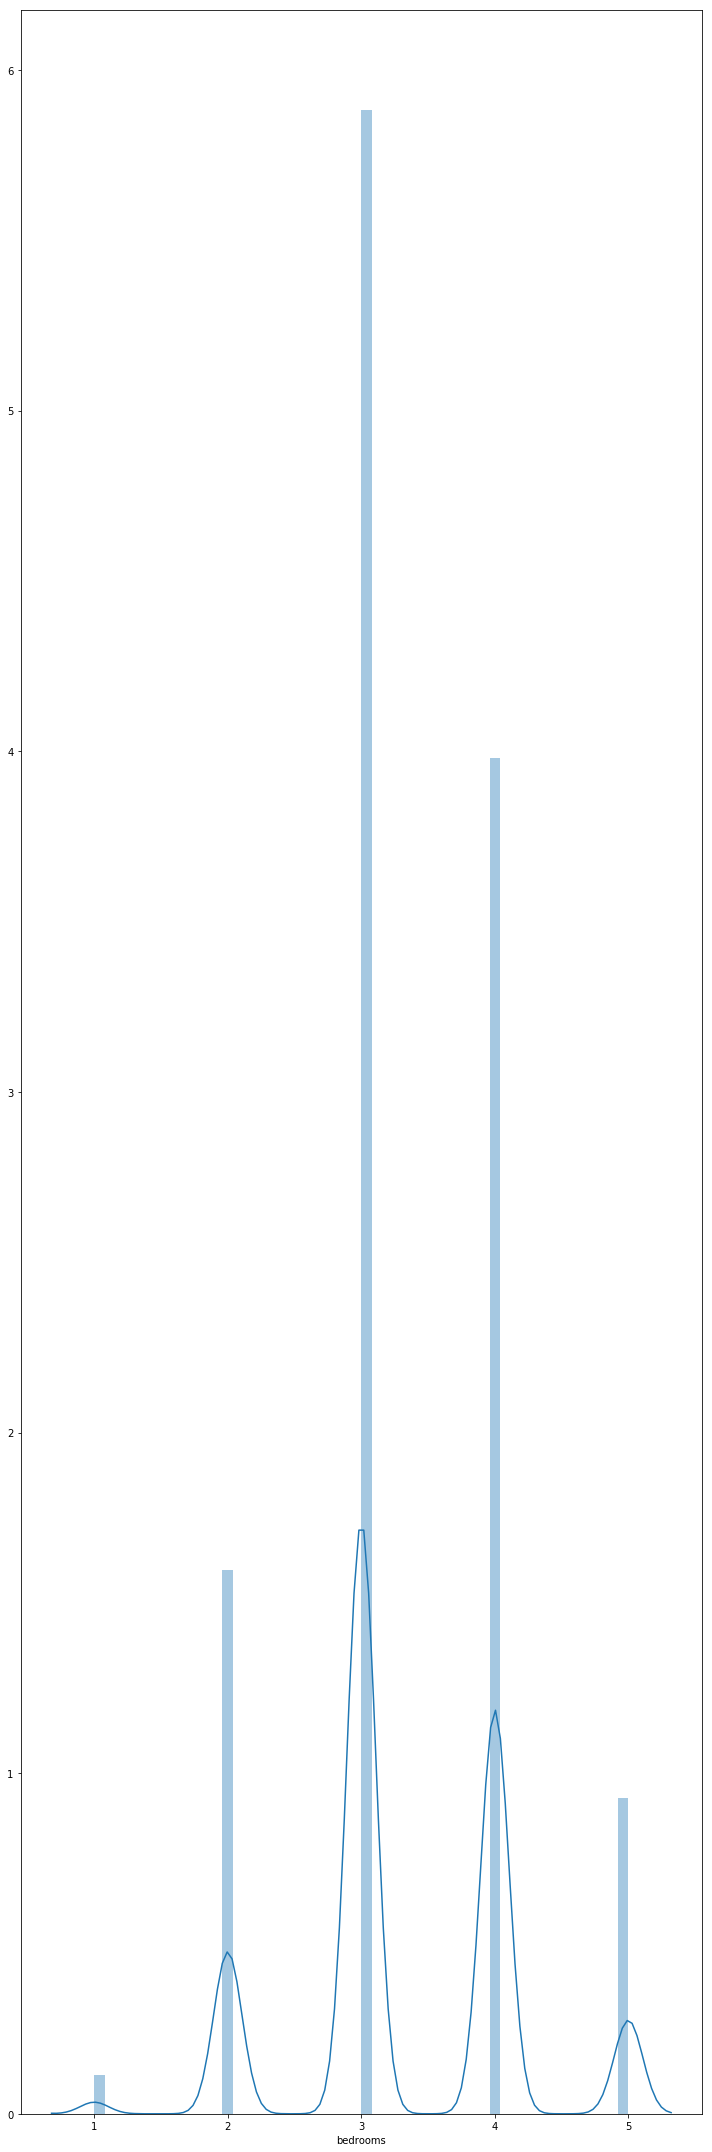

In [103]:
plt.figure(figsize=(10,30))
sns.distplot(df_house['bedrooms'])
plt.tight_layout()
plt.show()

# 2- Handling of outlier for feature Bathrooms 

# We will replace the outliers for feature Bathrooms with median where  values are Outside 3 standard deviations

In [251]:
median = df_house['bathrooms'].median(skipna = True)
median
df_house['bathrooms'] = np.where((df_house['bathrooms'] - median).abs() > (3*df_house.bathrooms.std()),median,df_house['bathrooms'])


2.25

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


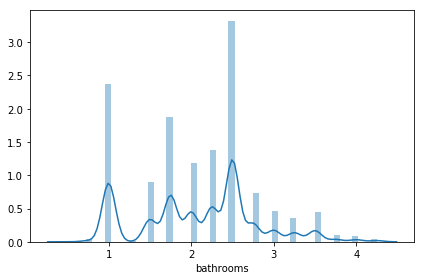

In [144]:
sns.distplot(df_house['bathrooms'])
plt.tight_layout()
plt.show()

In [124]:
# 3- Handling of outlier for feature sqft_living

# We will replace the outliers for feature Bathrooms with mean where  values are Outside 3 standard deviations

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


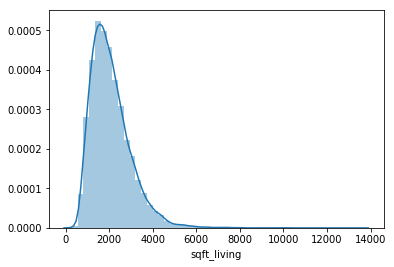

In [137]:
sns.distplot(df_house['sqft_living'])

In [252]:
mean = df_house['sqft_living'].mean(skipna = True)
mean
df_house['sqft_living'] = np.where((df_house['sqft_living'] - mean).abs() > (3*df_house.sqft_living.std()),mean,df_house['sqft_living'])

2079.8997362698374

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


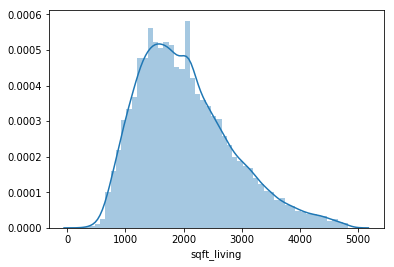

In [146]:
sns.distplot(df_house['sqft_living'])

In [147]:
# Handling Outlier for sqft_lot

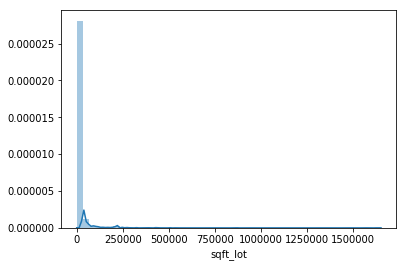

In [106]:
# Visualizing before handling
sns.distplot(df_house['sqft_lot'])

In [253]:
mean = df_house['sqft_lot'].mean(skipna = True)
mean
df_house['sqft_lot'] = np.where((df_house['sqft_lot'] - mean).abs() > (3*df_house.sqft_lot.std()),mean,df_house['sqft_lot'])

15106.967565816869

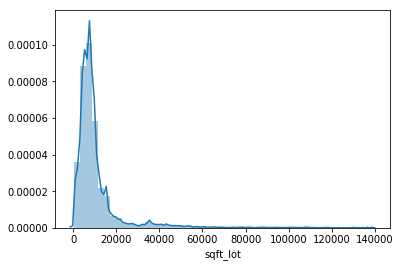

In [108]:
# Visualizing Post handling

sns.distplot(df_house['sqft_lot'])

In [ ]:
#  Calculating the outliers for rest of the features.

In [254]:
mean = df_house['sqft_above'].mean(skipna = True)
print ('Mean value for sqft_above:', mean)
df_house['sqft_above'] = np.where((df_house['sqft_above'] - mean).abs() > (3*df_house.sqft_above.std()),mean,df_house['sqft_above'])



mean = df_house['sqft_basement'].mean(skipna = True)
print ('Mean value for sqft_basement:',mean)
df_house['sqft_basement'] = np.where((df_house['sqft_basement'] - mean).abs() > (3*df_house.sqft_basement.std()),mean,df_house['sqft_basement'])


mean = df_house['long'].mean(skipna = True)
print ('Mean value for long:', mean)
df_house['long'] = np.where((df_house['long'] - mean).abs() > (3*df_house.long.std()),mean,df_house['long'])


mean = df_house['lat'].mean(skipna = True)
print ('Mean value for lat:',mean)
df_house['lat'] = np.where((df_house['lat'] - mean).abs() > (3*df_house.lat.std()),mean,df_house['lat'])



mean = df_house['sqft_living15'].mean(skipna = True)
print ('Mean value for sqft_living15:', mean)
df_house['sqft_living15'] = np.where((df_house['sqft_living15'] - mean).abs() > (3*df_house.sqft_living15.std()),mean,df_house['sqft_living15'])



mean = df_house['sqft_lot15'].mean(skipna = True)
print ('Mean value for sqft_lot15:', mean)
df_house['sqft_lot15'] = np.where((df_house['sqft_lot15'] - mean).abs() > (3*df_house.sqft_lot15.std()),mean,df_house['sqft_lot15'])

Mean value for sqft_above: 1788.3906907879516
Mean value for sqft_basement: 291.5090454818859
Mean value for long: -122.21389640494083
Mean value for lat: 47.56005251931704
Mean value for sqft_living15: 1986.552491556008
Mean value for sqft_lot15: 12768.455651691113


In [181]:
# converting the Date to Date time feature

In [202]:
df_house['date'] = pd.to_datetime(df_house['date'])

In [182]:
# HEAT MAP: Let us look at the correlation between varios variables and take action in case there is multicollinearity

<Figure size 1440x1440 with 0 Axes>

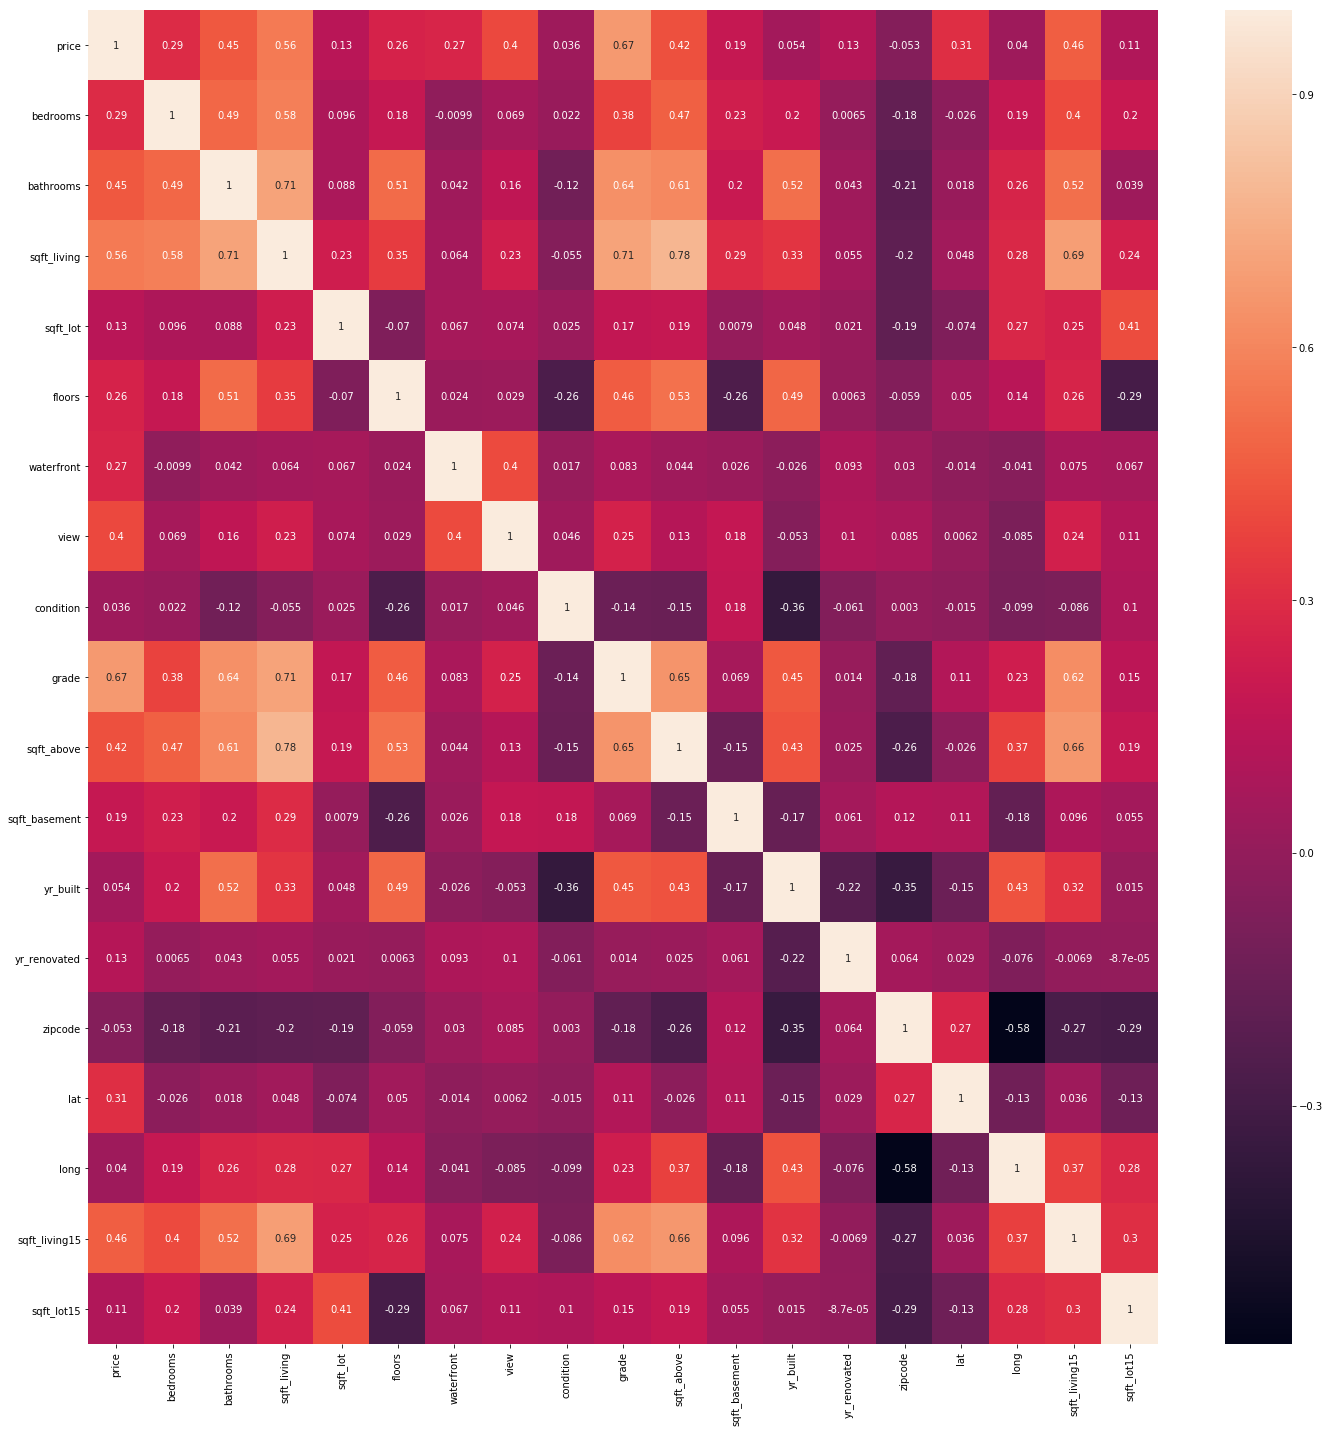

In [183]:
plt.figure(figsize=(20,20))
sns.heatmap(df_house.corr(), annot= True)
plt.tight_layout()
plt.show()

# Feature Engineering and Generating new features



1- Sqft lot and sqft Living does not have good correlated among each other but from our analysis we know they have good correlation with Price. 

Create one feature by combining both of them and see if this is still have good correlation with Price. 

We can infer that new feature created is also having positive correlation with Price.



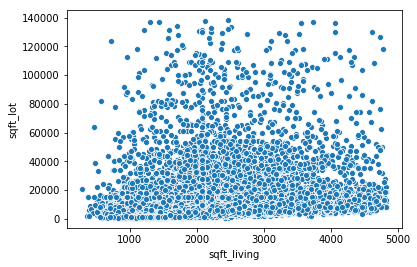

In [112]:
sns.scatterplot(x = 'sqft_living', y = 'sqft_lot', data = df_house)

In [255]:
df_house['sqft_total'] = df_house['sqft_living'] + df_house['sqft_lot']

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



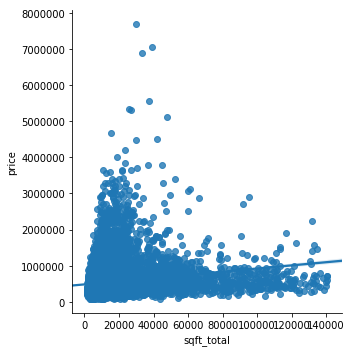

In [115]:
sns.lmplot(x = 'sqft_total', y = 'price', data = df_house)

2- sqft_living and sqft_above have very strong correlation among each other and both are conveying same information. 

After confiming that both infer same information we will drop either of them. 

We can confirm that they are positively correlated hence we will drop one feature. we will drop sqft_above.

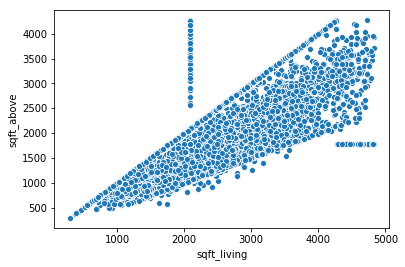

In [117]:
sns.scatterplot(x = 'sqft_living', y = 'sqft_above', data= df_house)

In [256]:
df_house.drop(columns=['sqft_above'] , inplace= True)

3- sqft_living and sqft_lot15 does not have good correlated among each other but from our analysis we know they have good correlation with Price. 

Create one feature by combining both of them and see if this is still have good correlation with Price. 

We can infer that new feature created is also having positive correlation with Price.


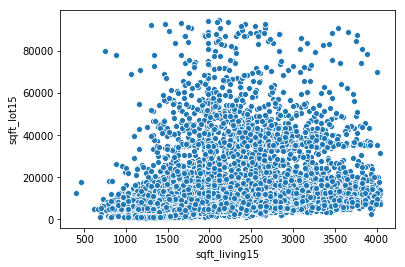

In [120]:
sns.scatterplot(x = 'sqft_living15', y = 'sqft_lot15', data = df_house)

In [257]:
df_house['sqft_total_15'] = df_house['sqft_living15'] + df_house['sqft_lot15']

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



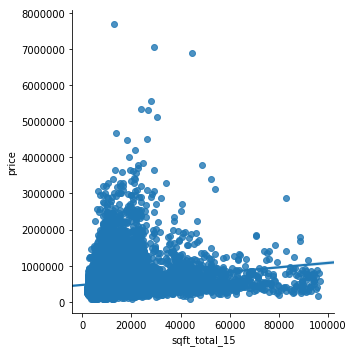

In [125]:
sns.lmplot(x = 'sqft_total_15', y = 'price', data = df_house)

4- We will drop the features which are repetitive or have been used to convert new features to make our dataset clean for modelling.

In [259]:
#  Missed to drop basement feature created only for EDA purpose
df_house.drop(columns=['basement'], inplace= True)

In [260]:
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sqft_total', 'sqft_total_15'],
      dtype='object')

In [264]:
df_house.drop(columns=['sqft_living','sqft_lot','sqft_living15','sqft_lot15', 'date'], inplace=True)

In [332]:
df_house.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_total', 'sqft_total_15'],
      dtype='object')

# Linear Regression Model

In [147]:
#  Split Dataset Independent Features in X and Target as y.

In [331]:
X = df_house.drop(columns=['price'])
y = df_house['price']

Importing all importing libraries which we will use in this model building.

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Splitting the Dataset into 60% Training, 20% Validation , 20% Test Set. 

When we are sure which algortihm is providing the best scores we will implement RandomCV/GridCV to find the best params and will use only Train Test to validate.


In [333]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .20, random_state = 1234)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 1234)

Creating the Pipeline for Model

In [334]:
pipeline = Pipeline([('sc', StandardScaler()), ('lr', LinearRegression())])

During Pipeline fit it will fit and transform the training set 

While calling the Predict function it will Transform the test set.

In [336]:
pipeline.fit(X_train,y_train)
pred_lr = pipeline.predict(X_val)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Score for the Validation set since we do not want to expose our Test Set to Model to avoid DATALEAKS.


In [337]:
pipeline.score(X_val,y_val)

0.6512964616650219

Not a Good Score. we will look at the Coffecients and Intercept.

In [291]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, pipeline.named_steps['lr'].coef_[idx]))
    
print ('\n')    
print("The Intercept for Linear Reg Model is {}".format(pipeline.named_steps['lr'].intercept_))    

The coefficient for bedrooms is 2286.8271396907653
The coefficient for bathrooms is 35146.603810829816
The coefficient for floors is 13714.588812398993
The coefficient for waterfront is 51062.91619895739
The coefficient for view is 52457.67009252651
The coefficient for condition is 18453.18782373593
The coefficient for grade is 202860.58930005398
The coefficient for sqft_above is 33621.277797185474
The coefficient for sqft_basement is 21939.539654976594
The coefficient for yr_built is -89280.74717717309
The coefficient for yr_renovated is 8573.556469079083
The coefficient for zipcode is -34262.68315843311
The coefficient for lat is 80981.90339154264
The coefficient for long is -14429.894295093764
The coefficient for sqft_total is 9680.31670360634
The coefficient for sqft_total_15 is -6458.645568288995


The Intercept for Linear Reg Model is 539554.0468478915


# Implementing the Ridge/Lasso

Step 1 - Create 2 Pipelines separately for Ridge and Lasso

step 2 - Define Hyperparameter for Ridge and Lasso

step 3 - Ridge: Use GridSearchCV for choosing the best estimators and Using Pipeline define the best score from Grid Search CV

step 4 - Lasso: Use GridSearchCV for choosing the best estimators and Using Pipeline define the best score from Grid Search CV

Step1:

In [341]:
pipeline1 = Pipeline([('sc', StandardScaler()), ('rid', Ridge())])
pipeline2 = Pipeline([('sc', StandardScaler()), ('lasso', Lasso())])

Step2:

In [392]:
param_grid_Ridge = {'rid__alpha':[0.005, 0.02, 0.03, 0.05, 0.06,0.1,0.8, 1.0, 2.0],
                     'rid__tol':[0.1,1,2,0.001,10]}
                   
param_grid_Lasso = {'lasso__alpha':[0.005, 0.02, 0.03, 0.05, 0.06,0.1,0.8, 1.0, 2.0]}

Step3: Ridge

In [393]:
GridCV = GridSearchCV(pipeline1,param_grid_Ridge,cv=10)
GridCV.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for Ridge is {}".format(GridCV.best_estimator_))
print ('\n')
print ("The Score after penalizing with Ridge is {}".format(GridCV.score(X_test,y_test)))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rid', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rid__alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.8, 1.0, 2.0], 'rid__tol': [0.1, 1, 2, 0.001, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best Parameter for Ridge is Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rid', Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1))])


The Score after penalizing with Ridge is 0.6513021716798053


Step4: Lasso

In [370]:
GridCV = GridSearchCV(pipeline2,param_grid_Lasso,cv=10)
GridCV.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for Lasso is {}".format(GridCV.best_estimator_))
print ('\n')
print ("The Score for Model after penalising with Lasso is {}".format(GridCV.score(X_test,y_test)))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.8, 1.0, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best Parameter for Lasso is Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])


The Score for Model after penalising with Lasso is 0.6512978206974244


# OBSERVATIONS:
1- Not Much Improvement in the scores using Ridge and Lasso even though tune the hyperparametrs.

2- Lasso tried to penalize the Coeffecient for Bedrooms to 0 which is not true as we know from our analysis in above that Bedrooms have some relationship existing with Price.

# Implementing Polynomial Features for the Model and then see the score if it improves for Linear/Lasso/Ridge.

Recreating the X and y variables since I do not want any DATALEAKS to happen hence avoiding model to learn any previous data

In [394]:
X = df_house.drop(columns=['price'])
y = df_house['price']

In [395]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 1234)

Step 1: Create the Pipeline with Polynomial Features

Step 2: Parameter tuning for Lasso and Ridge

Step 3: Gridsearch for defining the best score and parameters

Step1: Polynomial with degree 2

In [396]:
pipeline3 = Pipeline([('sc', StandardScaler()), ('poly',PolynomialFeatures(2)),('rid', LinearRegression())])
pipeline4 = Pipeline([('sc', StandardScaler()),('poly',PolynomialFeatures(2)), ('rid', Ridge())])
pipeline5 = Pipeline([('sc', StandardScaler()),('poly',PolynomialFeatures(2)), ('lasso', Lasso())])

In [397]:
param_grid_Ridge = {'rid__alpha':[0.005, 0.02, 0.03, 0.05, 0.06,0.1,0.8, 1.0, 2.0],
                     'rid__tol':[0.1,1,2,0.001,10]}
param_grid_Lasso = {'lasso__alpha':[0.005, 0.02, 0.03, 0.05, 0.06,0.1,0.8, 1.0, 2.0]}

In [387]:
pipeline3.fit(X_train,y_train)
pred_LR = pipeline3.predict(X_test)
print ('\n')
print ("The Score for LinearRegression Model is {}".format(pipeline3.score(X_test,y_test)))

rss=((y_test-pred_LR)**2).sum()
mse=np.mean((y_test-pred_LR)**2)
print ('\n')

print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_LR)**2)))

# print ("The RMSE for LinearRegression Model is {}".format(mean_squared_error(pred_LR,y_test)))

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('rid', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])



The Score for LinearRegression Model is 0.7417834148318407


Final rmse value is = 184281.59882724666


In [398]:
GridCV = GridSearchCV(pipeline4,param_grid_Ridge,cv=10)
GridCV.fit(X_train,y_train)
pred_Ridge = GridCV.predict(X_test)
print ('\n')
print ("Best Parameter for Ridge is {}".format(GridCV.best_estimator_))
print ('\n')
print ("The Score after penalizing with Ridge is {}".format(GridCV.score(X_test,y_test)))


rss=((y_test-pred_Ridge)**2).sum()
mse=np.mean((y_test-pred_Ridge)**2)
print ('\n')

print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_Ridge)**2)))


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('rid', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rid__alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.8, 1.0, 2.0], 'rid__tol': [0.1, 1, 2, 0.001, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best Parameter for Ridge is Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('rid', Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1))])


The Score after penalizing with Ridge is 0.7418472811174144


Final rmse value is = 184258.8076710404


In [390]:
GridCV = GridSearchCV(pipeline5,param_grid_Lasso,cv=10)
GridCV.fit(X_train,y_train)
pred_lasso = GridCV.predict(X_test)
print ('\n')
print ("Best Parameter for Lasso is {}".format(GridCV.best_estimator_))
print ('\n')
print ("The Score after penalizing with Lasso is {}".format(GridCV.score(X_test,y_test)))


rss=((y_test-pred_lasso)**2).sum()
mse=np.mean((y_test-pred_lasso)**2)
print ('\n')

print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_lasso)**2)))


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.8, 1.0, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best Parameter for Lasso is Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])


The Score after penalizing with Lasso is 0.7418423033907454


Final rmse value is = 184260.58411090059


# From the above Results showcase that Ridge with Polynomial Features with Degree 2 works well. 

# NEXT STEPS.. IT IS STILL NOT OVER YET:).

Step 1 - We will now implement Other regression models with pipelines within pipeline.

Step 2 - Use the k Fold Validation to determine which algorithm provide the best model with min rmse and max R2 score.

Step 3-  Once the Model is chosen we will further Optimize it using RandomSearchCV then followed by GridSearchCV.

Step 4-  Also Find the Feature Importances


 

In [402]:
# Again Reimporting the Dataset and splitting into train test to avoid Data leaks in case.

X = df_house.drop(columns=['price'])
y = df_house['price']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 1234)

# Below Code will execute the step 1 and step 2.
Step 1 - We will now implement Other regression models with pipelines within pipeline.
Step 2 - Use the k Fold Validation to determine which algorithm provide the best model with min rmse and max R2 score.


Ridge: 0.743565 (+/- 0.030628)
Lasso: 0.743581 (+/- 0.030628)
SVR_Reg: 0.021115 (+/- 0.007591)
RFC_Reg: 0.829225 (+/- 0.028156)
BR_reg: 0.830812 (+/- 0.026414)
XGB_reg: 0.831783 (+/- 0.025158)
ADA-Reg: -0.181487 (+/- 0.135286)
RFR_PCA: 0.504521 (+/- 0.039368)
XGBR_PCA: 0.545390 (+/- 0.038029)


Text(0.5, 0.98, 'Algorithm Comparison')

[Text(0, 0, 'Ridge'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'SVR_Reg'),
 Text(0, 0, 'RFC_Reg'),
 Text(0, 0, 'BR_reg'),
 Text(0, 0, 'XGB_reg'),
 Text(0, 0, 'ADA-Reg'),
 Text(0, 0, 'RFR_PCA'),
 Text(0, 0, 'XGBR_PCA')]

Text(0.5, 0, 'Algorithmn Name')

Text(0, 0.5, 'R Squared Score of Models')

[Text(0, 0, 'Ridge'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'SVR_Reg'),
 Text(0, 0, 'RFC_Reg'),
 Text(0, 0, 'BR_reg'),
 Text(0, 0, 'XGB_reg'),
 Text(0, 0, 'ADA-Reg'),
 Text(0, 0, 'RFR_PCA'),
 Text(0, 0, 'XGBR_PCA')]

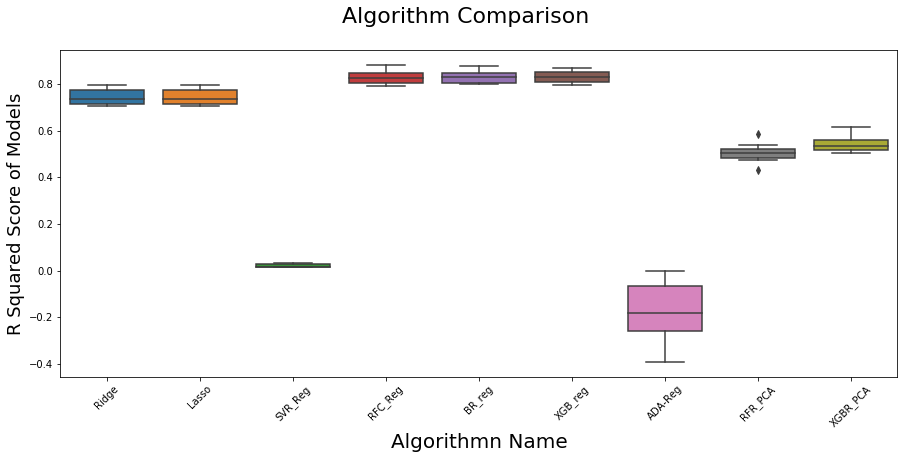

In [411]:
# Step 1 - We will now implement Other regression models with pipelines within pipeline.

pipelines = []
seed = 2

pipelines.append(
                ("Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), ('poly',PolynomialFeatures(2)),
                     ("rid", Ridge(random_state=seed, tol=0.1,alpha=2.0 ))
                      ]))
                )
pipelines.append(
                ("Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()),('poly',PolynomialFeatures(2)),
                     ("Lasso", Lasso(random_state=seed, tol=0.1,alpha=2.0))
                      ]))
                )

pipelines.append(
                ("SVR_Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1.0, degree=5))
                 ])
                )
                )

pipelines.append(
                ("RFC_Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed,n_estimators =10))
                 ])
                )
                )

pipelines.append(
                ("BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 


pipelines.append(
                ("ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                    ("ADA-reg", AdaBoostRegressor())
                 ]))) 


pipelines.append(
                ("RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("RFR", RandomForestRegressor())
                 ])))

pipelines.append(
                ("XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

# Step 2

scoring = 'r2'
n_folds = 10

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# We Can make the inference that XGBoost , Random Forest and Bagging Regressor works Best. 

# Step 3 and Step 4 Starts Here which were defined above...

# We are picking XGBoost and Random Forest and further optimize the same then generate the Important Features.

In [462]:
pipeline_RFC = Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                

pipeline_XGB = Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ])
seed = 2

In [422]:
# Hyperparameter Tuning for RFC using RandomCV

In [463]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_rfc = {'RF__n_estimators': n_estimators,
               'RF__max_features': max_features,
               'RF__max_depth': max_depth,
               'RF__min_samples_split': min_samples_split,
               'RF__min_samples_leaf': min_samples_leaf,
               'RF__bootstrap': bootstrap}


In [472]:
RandomCV = RandomizedSearchCV(pipeline_RFC,random_grid_rfc,cv=10)
RandomCV.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomCV.best_estimator_))
print ('\n')
print ("The Score with RandomCV is {}".format(RandomCV.score(X_test,y_test) * 100))

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spli...ors='warn', n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'RF__n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'RF__max_features': ['auto', 'sqrt'], 'RF__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'RF__min_samples_split': [2, 5, 10], 'RF__min_samples_leaf': [1, 2, 4], 'RF__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)



Best Parameter for RandomCV is Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=136, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False))])
The Score after penalizing with Ridge is 83.58527675347145


In [481]:
print ("The Score with RandomCV is {}".format(RandomCV.score(X_test,y_test) * 100))

preds = RandomCV.predict(X_test)

rss=((y_test-preds)**2).sum()
mse=np.mean((y_test-preds)**2)
print ('\n')

print("Final rmse value is =",np.sqrt(np.mean((y_test-preds)**2)))


The Score with RandomCV is 83.58527675347145


Final rmse value is = 146928.71732850716


# Hyperparameter tuning using GridsearchCV. 

# From the RandomSearch we recieved the ranges now we will do the point estimates using GridsearchCV--> This step is taking lot of training time. If there is better configuration go for this one to have best point estimate.

In [465]:
# n_estimators = range(180,210)
# # Number of features to consider at every split
# max_features = ['sqrt']
# # Maximum number of levels in tree
# max_depth = range(20,40)
# # Minimum number of samples required to split a node
# min_samples_split = range(2,5)
# # Minimum number of samples required at each leaf node
# min_samples_leaf = range(2,6)
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# grid_rfc = {'RF__n_estimators': n_estimators,
#                'RF__max_features': max_features,
#                'RF__max_depth': max_depth,
#                'RF__min_samples_split': min_samples_split,
#                'RF__min_samples_leaf': min_samples_leaf,
#                'RF__bootstrap': bootstrap}


In [467]:
# GridSearch = GridSearchCV(pipeline_RFC,grid_rfc,cv=3)
# GridSearch.fit(X_train,y_train)
# preds = GridSearch.predict(X_test)
# print ('\n')
# print ("Best Parameter for GridCV is {}".format(GridSearch.best_estimator_))
# print ('\n')
# print ("The Score with RFC is {}".format(GridSearch.score(X_test,y_test)))

# # Calculate RMSE

# rss=((y_test-preds)**2).sum()
# mse=np.mean((y_test-preds)**2)
# print ('\n')

# print("Final rmse value is =",np.sqrt(np.mean((y_test-preds)**2)))



# Feature Importance for RFC

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False))])

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x1dd97c86940>,
 <a list of 15 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

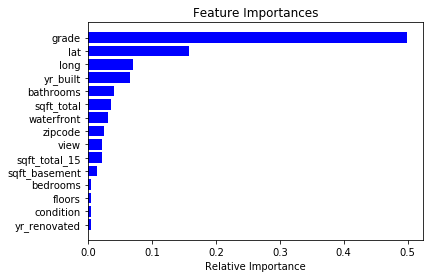

In [524]:
pipeline_RFC.fit(X_train,y_train) #We have to refit the pipeline since Grid Search is not allowed to show the feat imps
importances = pipeline_RFC.steps[1][1].feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Implement XGBoostRegressor with hyperparameter using GridSearch

In [484]:
param_grid_XGB = {
'XGBR__max_depth':range(3,10,2),
'XGBR__min_child_weight':range(1,6,2),
'XGBR__gamma':[i/10.0 for i in range(0,5)],
'XGBR__subsample':[i/10.0 for i in range(6,10)],
'XGBR__colsample_bytree':[i/10.0 for i in range(6,10)],
'XGBR__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
'XGBR__learning_rate' : [0.1,0.001,0.3] ,
'XGBR__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
'XGBR__nthread' : [2,3,5] , 
'XGBR__scale_pos_weight' : 1,
'XGBR__scale_pos_weight': [1,2]
    }

In [485]:
RandomCV = RandomizedSearchCV(pipeline_XGB,param_grid_XGB,cv=3)
RandomCV.fit(X_train,y_train)
preds = RandomCV.predict(X_test)
print ('\n')
print ("Best Parameter for GridCV is {}".format(RandomCV.best_estimator_))
print ('\n')
print ("The Score for XGB is {}".format(RandomCV.score(X_test,y_test)))

# Calculate RMSE

rss=((y_test-preds)**2).sum()
mse=np.mean((y_test-preds)**2)
print ('\n')

print("Final rmse value is =",np.sqrt(np.mean((y_test-preds)**2)))



RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('XGBR', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight...0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=1))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'XGBR__max_depth': range(3, 10, 2), 'XGBR__min_child_weight': range(1, 6, 2), 'XGBR__gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'XGBR__subsample': [0.6, 0.7, 0.8, 0.9], 'XGBR__colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'XGBR__reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'XGBR__learning_rate': [0.1, 0.001, 0.3], 'XGBR__n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'XGBR__nthread': [2, 3, 5], 'XGBR__scale_pos_weight': [1, 2]},
   



Best Parameter for GridCV is Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('XGBR', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.3,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=52, n_jobs=1, nthread=3, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=2,
       seed=2, silent=True, subsample=0.7))])


The Score for XGB is 0.8144995268858921


Final rmse value is = 156193.3053936318


# Let us conclude our Model Building here:

# We will use finally RandomForestRegrossor as an ensemble when we do productionized Model for this Problem.
# RandomForest have got the best accuracy so far with 83.5% which is better then other Models also.